In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from astropy.io import fits


In [2]:
filepath = '/Users/jimenagonzalez/research/DSPL/SpaceWarps_Inspection/Results/fits_files/'
# Candidates above threshold
hdu_list = fits.open(filepath + 'candidates_experts.fits')
images_cand = hdu_list[1].data
cand_jimena = pd.DataFrame(hdu_list[2].data)
hdu_list.close()
print(len(cand_jimena))

2502


In [3]:
data = pd.read_csv('intersection.csv')
data = data.dropna()  # Remove rows with NaN values
data = data.replace([np.inf, -np.inf], np.nan).dropna()  # Remove rows with infinite values

In [4]:
print(len(data))
data.head()

753222


,K_RA,K_DEC,K_SCORE,Y3_COADD_OBJECT_ID,J_RA,J_DEC,score_sims,score_real,score_both,COADD_OBJECT_ID,...,G_DEC,SINGLE,RING,SMOOTH,COMPANIONS,SDSS_SPIRALS,DES_SPIRALS,CROWDED,ARTIFACTS,MOST_NEGATIVES
0,44.737850,0.295359,0.000012,333398760,44.737850,0.295359,0.0000,0.0,0.0,1356898855,...,0.295326,0.0002,0.0001,0.0012,0.0003,0.0005,0.0002,0.0001,0.0009,0.9966
1,44.990078,0.077219,0.000005,333407081,44.990078,0.077219,0.0002,0.0,0.0,1357045687,...,0.077188,0.0001,0.0001,0.0002,0.0052,0.0019,0.0006,0.0002,0.0015,0.9902
2,44.892011,0.149623,0.000006,333404699,44.892011,0.149623,0.0000,0.0,0.0,1357040498,...,0.149593,0.0000,0.0000,0.0001,0.0004,0.0005,0.0006,0.0001,0.0015,0.9967
3,44.952158,0.111372,0.000014,333405923,44.952158,0.111372,0.0000,0.0,0.0,1357043160,...,0.111335,0.0001,0.0000,0.0004,0.0018,0.0001,0.0001,0.0040,0.0013,0.9922
4,44.834282,0.290406,0.000004,333398843,44.834282,0.290406,0.0000,0.0,0.0,1356898678,...,0.290377,0.0001,0.0001,0.0002,0.0001,0.0009,0.0001,0.0001,0.0001,0.9983


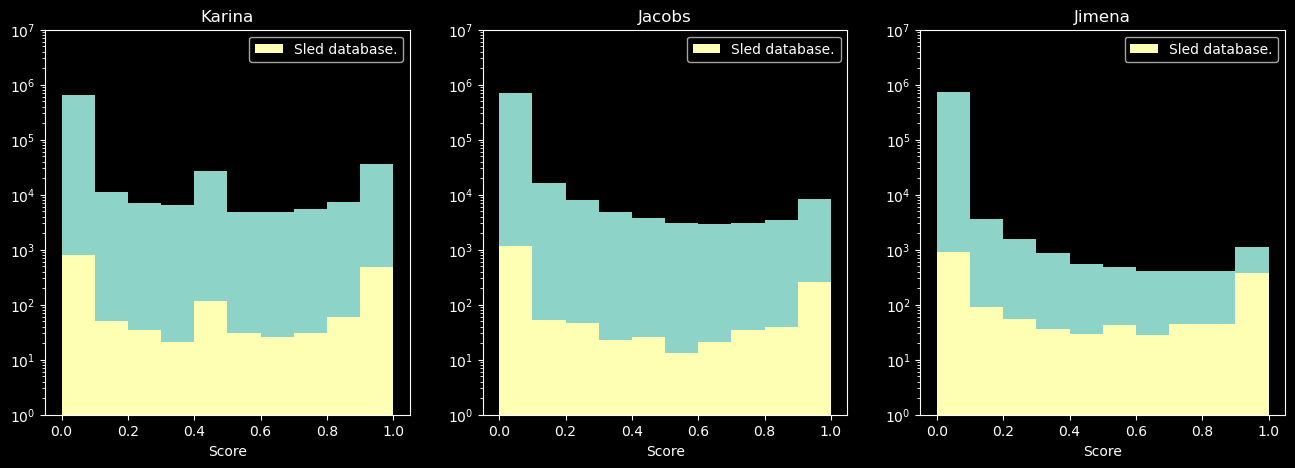

In [5]:
cand_sled = pd.read_csv('data/in_SLED2.csv')
cand_sled = cand_sled[cand_sled['score'].notnull()]
cand_sled['score'] = pd.to_numeric(cand_sled['score'], errors='coerce')
cand_sled = cand_sled.dropna(subset=['score'])
cand_sled = cand_sled.reset_index(drop=True)
cand_sled = cand_sled.astype({'score': float})
#cand_sled = cand_sled[cand_sled['score'] > 2]

plt.figure(figsize=(16,5)) 
    
plt.subplot(1,3,1)
plt.title('Karina')
plt.hist(data['K_SCORE'])
plt.hist(cand_sled['K_SCORE'], label='Sled database.')
plt.xlabel('Score')
plt.yscale('log')
plt.ylim(1, 10**7)
plt.legend()

plt.subplot(1,3,2)
plt.title('Jacobs')
plt.hist(data['score_sims'])
plt.hist(cand_sled['score_sims'], label='Sled database.')
plt.xlabel('Score')
plt.yscale('log')
plt.ylim(1, 10**7)
plt.legend()

plt.subplot(1,3,3)
plt.title('Jimena')
plt.hist(data['SINGLE'])
plt.hist(cand_sled['SINGLE'], label='Sled database.')
plt.xlabel('Score')
plt.yscale('log')
plt.ylim(1, 10**7)
plt.legend()

plt.show()


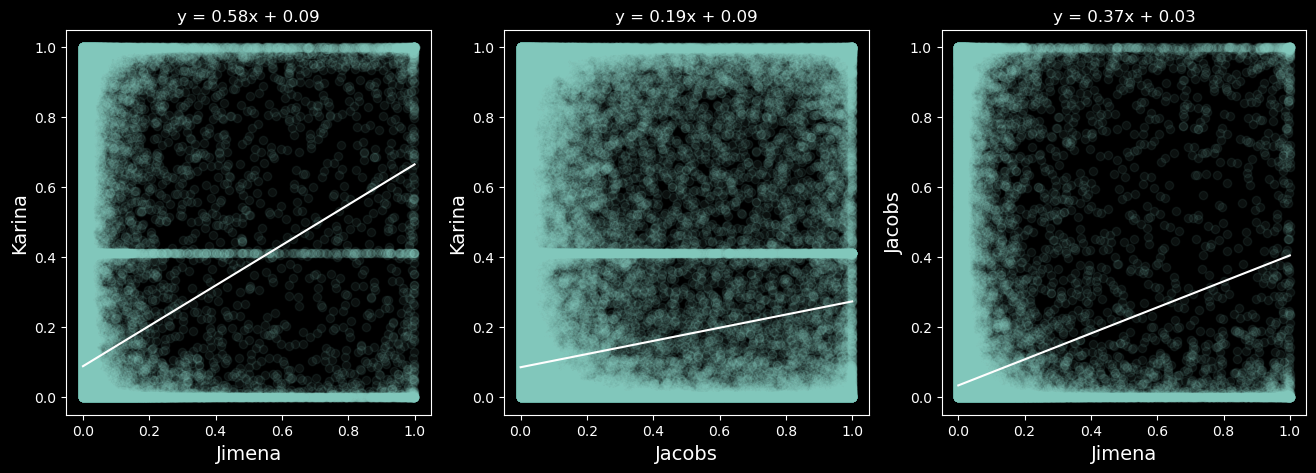

In [6]:
linear_regressor = LinearRegression()

#Studying correlations
plt.figure(figsize=(16,5)) 
    
X, Y = data['SINGLE'].values.reshape(-1, 1) , data['K_SCORE'].values.reshape(-1, 1) 
linear_regressor.fit(X, Y) 
x = np.linspace(0, 1 ,100)
y = linear_regressor.coef_[0]*x + linear_regressor.intercept_

plt.subplot(1,3,1)
plt.ylabel('Karina', fontsize=14)
plt.xlabel('Jimena', fontsize=14)
plt.plot(data['SINGLE'], data['K_SCORE'], 'o', alpha=0.08)
equation = 'y = {:.2f}x + {:.2f}'.format(linear_regressor.coef_[0][0], linear_regressor.intercept_[0])
plt.title(equation)
plt.plot(x, y, color='w')

X, Y = data['score_sims'].values.reshape(-1, 1) , data['K_SCORE'].values.reshape(-1, 1) 
linear_regressor.fit(X, Y) 
x = np.linspace(0, 1 ,100)
y = linear_regressor.coef_[0]*x + linear_regressor.intercept_

plt.subplot(1,3,2)
plt.ylabel('Karina', fontsize=14)
plt.xlabel('Jacobs', fontsize=14)
plt.plot(data['score_sims'], data['K_SCORE'], 'o', alpha=0.08)
equation = 'y = {:.2f}x + {:.2f}'.format(linear_regressor.coef_[0][0], linear_regressor.intercept_[0])
plt.title(equation)
plt.plot(x, y, color='w')

X, Y = data['SINGLE'].values.reshape(-1, 1) , data['score_sims'].values.reshape(-1, 1) 
linear_regressor.fit(X, Y) 
x = np.linspace(0, 1 ,100)
y = linear_regressor.coef_[0]*x + linear_regressor.intercept_

plt.subplot(1,3,3)
plt.xlabel('Jimena', fontsize=14)
plt.ylabel('Jacobs', fontsize=14)
plt.plot(data['SINGLE'], data['score_sims'], 'o', alpha=0.08)
equation = 'y = {:.2f}x + {:.2f}'.format(linear_regressor.coef_[0][0], linear_regressor.intercept_[0])
plt.title(equation)
plt.plot(x, y, color='w')
        
plt.show()

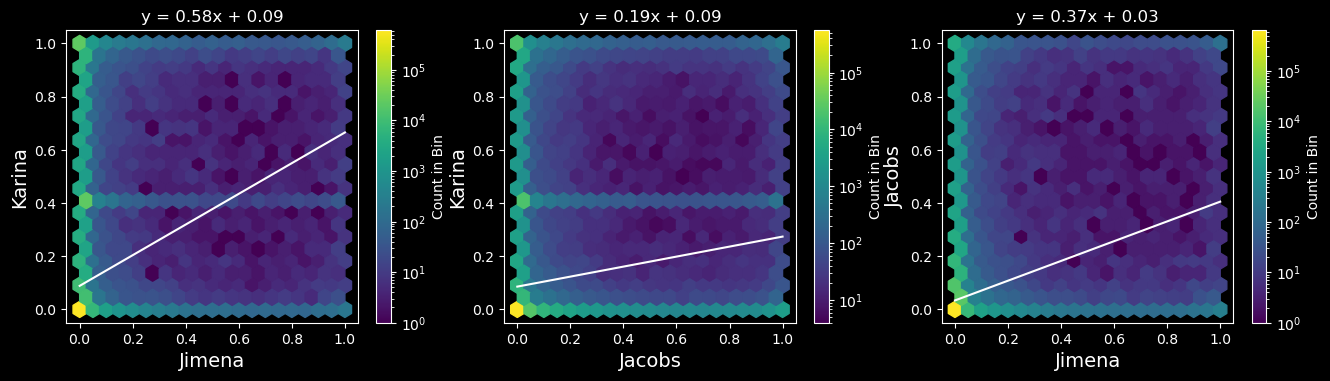

In [7]:
import matplotlib.colors as mcolors

plt.figure(figsize=(16,3.8)) 
    
X, Y = data['SINGLE'].values.reshape(-1, 1) , data['K_SCORE'].values.reshape(-1, 1) 
linear_regressor.fit(X, Y) 
x = np.linspace(0, 1 ,100)
y = linear_regressor.coef_[0]*x + linear_regressor.intercept_

plt.subplot(1,3,1)
plt.ylabel('Karina', fontsize=14)
plt.xlabel('Jimena', fontsize=14)
plt.hexbin(data['SINGLE'], data['K_SCORE'], gridsize=20, cmap='viridis', norm=mcolors.LogNorm())
plt.colorbar(label='Count in Bin')
#plt.plot(data['SINGLE'], data['K_SCORE'], 'o', alpha=0.1)
equation = 'y = {:.2f}x + {:.2f}'.format(linear_regressor.coef_[0][0], linear_regressor.intercept_[0])
plt.title(equation)
plt.plot(x, y, color='w')

X, Y = data['score_sims'].values.reshape(-1, 1) , data['K_SCORE'].values.reshape(-1, 1) 
linear_regressor.fit(X, Y) 
x = np.linspace(0, 1 ,100)
y = linear_regressor.coef_[0]*x + linear_regressor.intercept_

plt.subplot(1,3,2)
plt.ylabel('Karina', fontsize=14)
plt.xlabel('Jacobs', fontsize=14)
#plt.plot(data['score_sims'], data['K_SCORE'], 'o', alpha=0.1)
plt.hexbin(data['score_sims'], data['K_SCORE'], gridsize=20, cmap='viridis', norm=mcolors.LogNorm())
plt.colorbar(label='Count in Bin')
equation = 'y = {:.2f}x + {:.2f}'.format(linear_regressor.coef_[0][0], linear_regressor.intercept_[0])
plt.title(equation)
plt.plot(x, y, color='w')

X, Y = data['SINGLE'].values.reshape(-1, 1) , data['score_sims'].values.reshape(-1, 1) 
linear_regressor.fit(X, Y) 
x = np.linspace(0, 1 ,100)
y = linear_regressor.coef_[0]*x + linear_regressor.intercept_

plt.subplot(1,3,3)
plt.xlabel('Jimena', fontsize=14)
plt.ylabel('Jacobs', fontsize=14)
#plt.plot(data['SINGLE'], data['score_sims'], 'o', alpha=0.1)
plt.hexbin(data['SINGLE'], data['score_sims'], gridsize=20, cmap='viridis', norm=mcolors.LogNorm())
plt.colorbar(label='Count in Bin')
equation = 'y = {:.2f}x + {:.2f}'.format(linear_regressor.coef_[0][0], linear_regressor.intercept_[0])
plt.title(equation)
plt.plot(x, y, color='w')
        
plt.show()

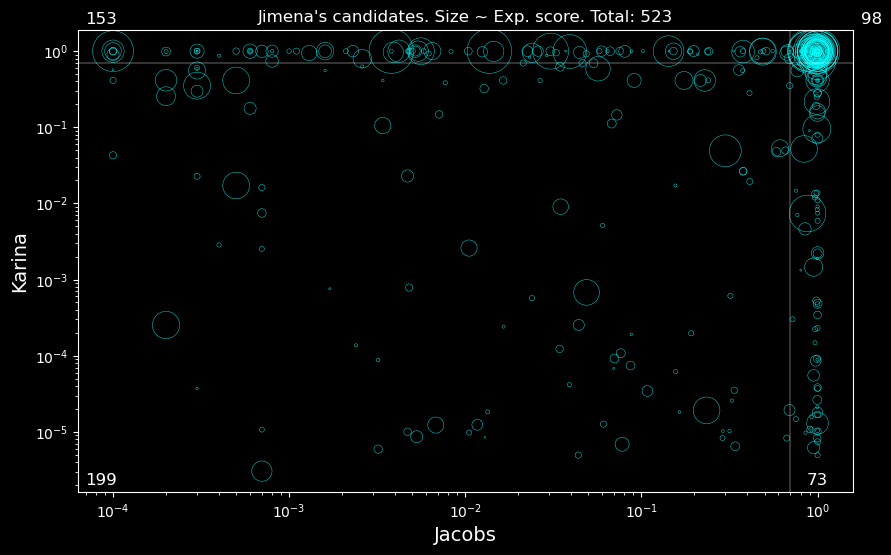

In [8]:
# In Jimena's candidates
cand_jimena = pd.read_csv('data/in_jimena.csv')
# Adding my expert scores to the data
cand_jimena = pd.merge(data, cand_jimena[['Aver_norm_wo_8', 'COADD_OBJECT_ID']],how ='inner', on='COADD_OBJECT_ID')
#size = cand_jimena['Aver_norm_wo_8']*200 + [0.5]*len(cand_jimena)
size = (cand_jimena['Aver_norm_wo_8'] + [1]*len(cand_jimena))**5 

plt.figure(figsize=(10,6)) 
plt.title('Jimena\'s candidates. Size ~ Exp. score. Total: ' + str(len(cand_jimena)))
plt.ylabel('Karina', fontsize=14)
plt.xlabel('Jacobs', fontsize=14)
plt.scatter(cand_jimena['score_sims'], cand_jimena['K_SCORE'], alpha=1, s=size.values, 
            edgecolors='#00FFFF', facecolors='none', linewidth=0.3)
plt.yscale("log")
plt.xscale("log")

plt.axhline(y=0.7, color='w', linestyle='-', linewidth=0.3)
plt.axvline(x=0.7, color='w', linestyle='-', linewidth=0.3)
    
# Calculate number of points in each region
region_1 = ((cand_jimena['score_sims'] >= 0.7) & (cand_jimena['K_SCORE'] >= 0.7)).sum()
region_2 = ((cand_jimena['score_sims'] < 0.7) & (cand_jimena['K_SCORE'] >= 0.7)).sum()
region_3 = ((cand_jimena['score_sims'] < 0.7) & (cand_jimena['K_SCORE'] < 0.7)).sum()
region_4 = ((cand_jimena['score_sims'] >= 0.7) & (cand_jimena['K_SCORE'] < 0.7)).sum()

# Add text to each region
plt.text(1.01, 1+0.04, f'{region_1}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', horizontalalignment='left', color='white')
plt.text(0.01, 1+0.04, f'{region_2}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', horizontalalignment='left', color='white')
plt.text(0.01, 0.01, f'{region_3}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='bottom', horizontalalignment='left', color='white')
plt.text(0.94, 0.01, f'{region_4}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='bottom', horizontalalignment='left', color='white')

plt.show()

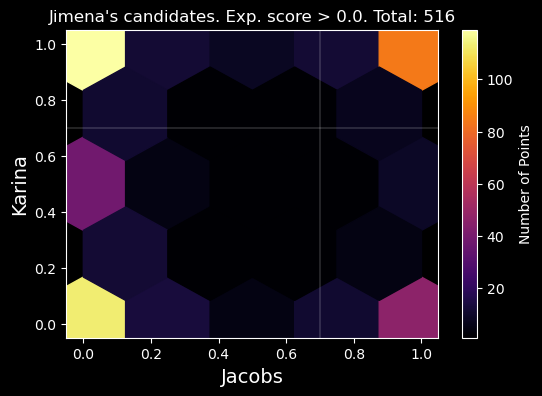

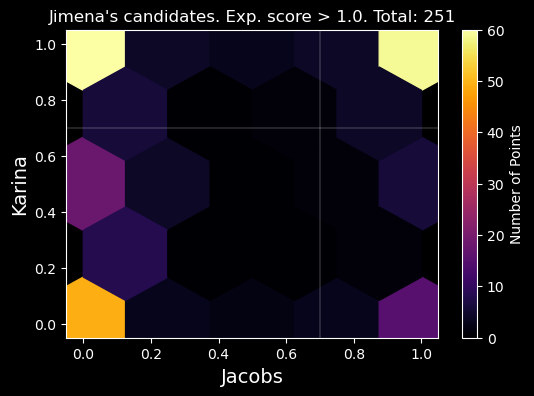

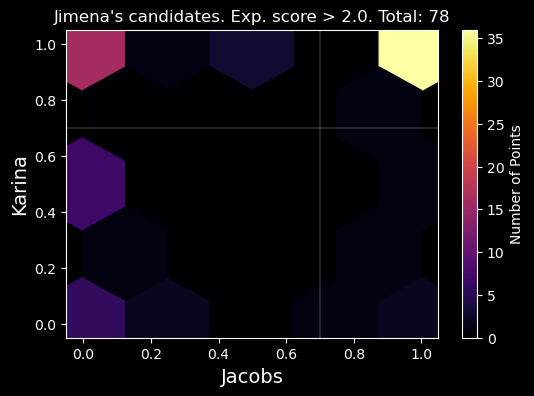

In [9]:
# In Jimena's candidates, heat map

dist_scores = np.linspace(0, 2, 3)

for i in range(len(dist_scores)):
    data_tmp = cand_jimena[cand_jimena['Aver_norm_wo_8'] > dist_scores[i]]

    plt.figure(figsize=(6,4)) 
    text = 'Jimena\'s candidates. Exp. score > {}. Total: {}'.format(dist_scores[i], len(data_tmp))
    plt.title(text)
    plt.ylabel('Karina', fontsize=14)
    plt.xlabel('Jacobs', fontsize=14)
    hb = plt.hexbin(data_tmp['score_sims'], data_tmp['K_SCORE'], gridsize=4, cmap='inferno')#, vmin=0, vmax=180)
    cb = plt.colorbar(hb)
    cb.set_label('Number of Points')

    plt.axhline(y=0.7, color='w', linestyle='-', linewidth=0.2)
    plt.axvline(x=0.7, color='w', linestyle='-', linewidth=0.2)

    plt.show()

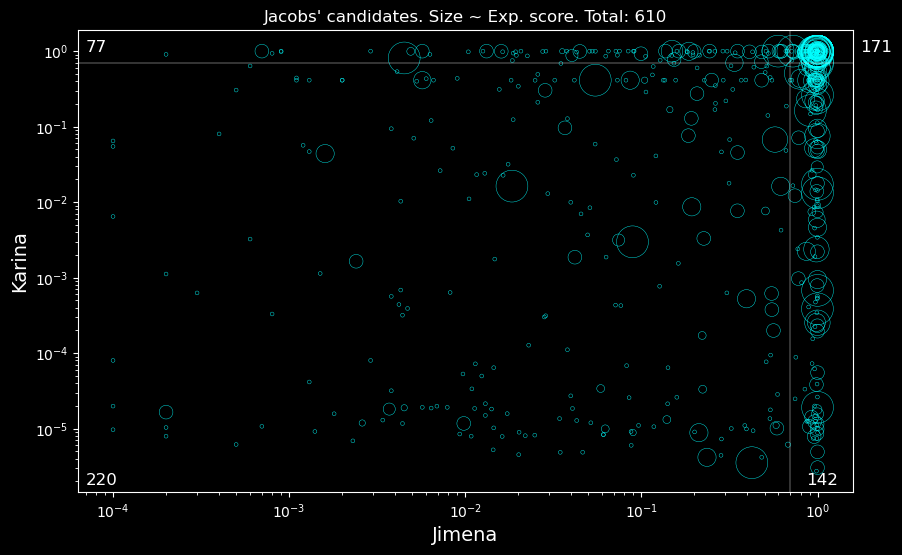

In [10]:
# In Jacobs' candidates
cand_jacobs = pd.read_csv('data/in_jacobs.csv')
# Adding my expert scores to the data
size = (cand_jacobs['score'] + [0.5]*len(cand_jacobs))**5 

plt.figure(figsize=(10,6)) 
plt.title('Jacobs\' candidates. Size ~ Exp. score. Total: ' + str(len(cand_jacobs)))
plt.ylabel('Karina', fontsize=14)
plt.xlabel('Jimena', fontsize=14)
plt.scatter(cand_jacobs['SINGLE'], cand_jacobs['K_SCORE'], alpha=1, s=size.values, 
            edgecolors='#00FFFF', facecolors='none', linewidth=0.3)
plt.yscale("log")
plt.xscale("log")

plt.axhline(y=0.7, color='w', linestyle='-', linewidth=0.3)
plt.axvline(x=0.7, color='w', linestyle='-', linewidth=0.3)
    
# Calculate number of points in each region
region_1 = ((cand_jacobs['SINGLE'] >= 0.7) & (cand_jacobs['K_SCORE'] >= 0.7)).sum()
region_2 = ((cand_jacobs['SINGLE'] < 0.7) & (cand_jacobs['K_SCORE'] >= 0.7)).sum()
region_3 = ((cand_jacobs['SINGLE'] < 0.7) & (cand_jacobs['K_SCORE'] < 0.7)).sum()
region_4 = ((cand_jacobs['SINGLE'] >= 0.7) & (cand_jacobs['K_SCORE'] < 0.7)).sum()

# Add text to each region
plt.text(1.01, 1-0.02, f'{region_1}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', horizontalalignment='left', color='white')
plt.text(0.01, 1-0.02, f'{region_2}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', horizontalalignment='left', color='white')
plt.text(0.01, 0.01, f'{region_3}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='bottom', horizontalalignment='left', color='white')
plt.text(0.94, 0.01, f'{region_4}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='bottom', horizontalalignment='left', color='white')

plt.show()

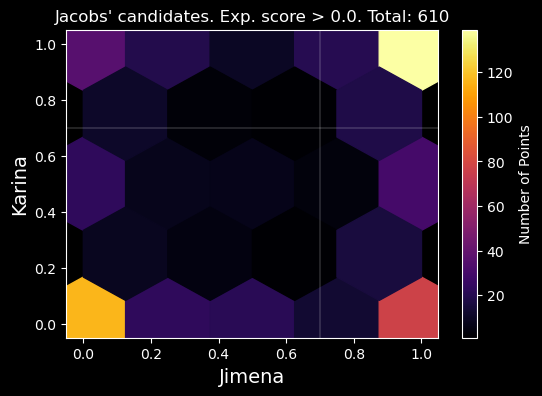

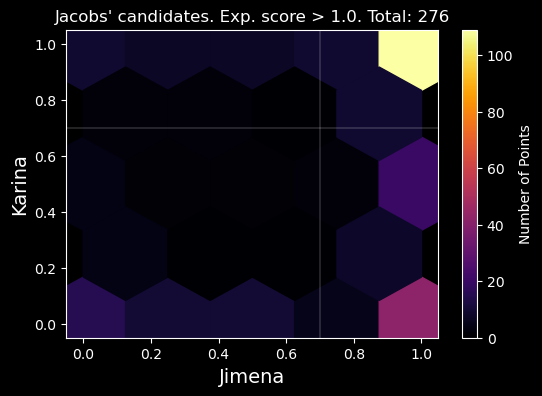

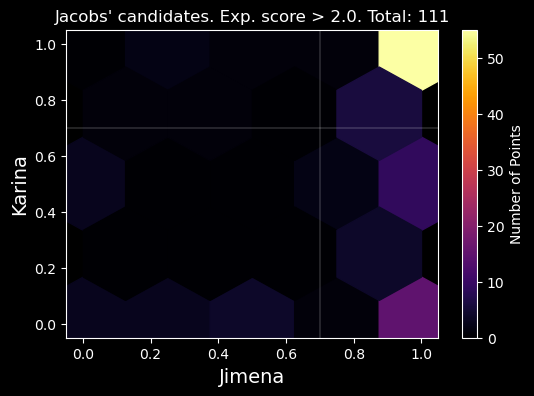

In [11]:
# In Jacobs's candidates, heat map

dist_scores = np.linspace(0, 2, 3)

for i in range(len(dist_scores)):
    data_tmp = cand_jacobs[cand_jacobs['score'] > dist_scores[i]]

    plt.figure(figsize=(6,4)) 
    text = 'Jacobs\' candidates. Exp. score > {}. Total: {}'.format(dist_scores[i], len(data_tmp))
    plt.title(text)
    plt.ylabel('Karina', fontsize=14)
    plt.xlabel('Jimena', fontsize=14)
    hb = plt.hexbin(data_tmp['SINGLE'], data_tmp['K_SCORE'], gridsize=4, cmap='inferno')#, vmin=0, vmax=210)
    cb = plt.colorbar(hb)
    cb.set_label('Number of Points')

    plt.axhline(y=0.7, color='w', linestyle='-', linewidth=0.2)
    plt.axvline(x=0.7, color='w', linestyle='-', linewidth=0.2)

    plt.show()

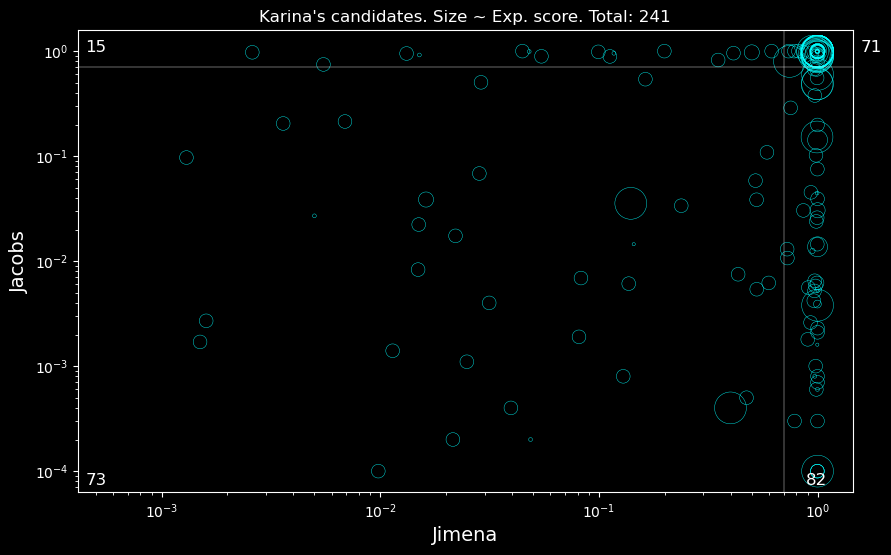

In [12]:
# In Karinas' candidates
cand_karina = pd.read_csv('data/in_karina.csv')
# Adding my expert scores to the data
size = (cand_karina['score'] + [0.5]*len(cand_karina))**5 

plt.figure(figsize=(10,6)) 
plt.title('Karina\'s candidates. Size ~ Exp. score. Total: ' + str(len(cand_karina)))
plt.ylabel('Jacobs', fontsize=14)
plt.xlabel('Jimena', fontsize=14)
plt.scatter(cand_karina['SINGLE'], cand_karina['score_sims'], alpha=1, s=size.values, 
            edgecolors='#00FFFF', facecolors='none', linewidth=0.3)
plt.yscale("log")
plt.xscale("log")

plt.axhline(y=0.7, color='w', linestyle='-', linewidth=0.3)
plt.axvline(x=0.7, color='w', linestyle='-', linewidth=0.3)
    
# Calculate number of points in each region
region_1 = ((cand_karina['SINGLE'] >= 0.7) & (cand_karina['score_sims'] >= 0.7)).sum()
region_2 = ((cand_karina['SINGLE'] < 0.7) & (cand_karina['score_sims'] >= 0.7)).sum()
region_3 = ((cand_karina['SINGLE'] < 0.7) & (cand_karina['score_sims'] < 0.7)).sum()
region_4 = ((cand_karina['SINGLE'] >= 0.7) & (cand_karina['score_sims'] < 0.7)).sum()

# Add text to each region
plt.text(1.01, 1-0.02, f'{region_1}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', horizontalalignment='left', color='white')
plt.text(0.01, 1-0.02, f'{region_2}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', horizontalalignment='left', color='white')
plt.text(0.01, 0.01, f'{region_3}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='bottom', horizontalalignment='left', color='white')
plt.text(0.94, 0.01, f'{region_4}', transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='bottom', horizontalalignment='left', color='white')

plt.show()

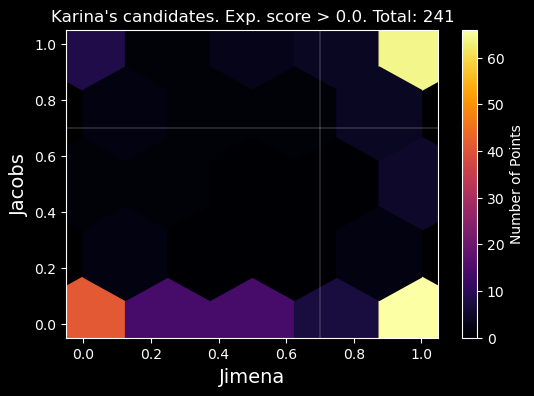

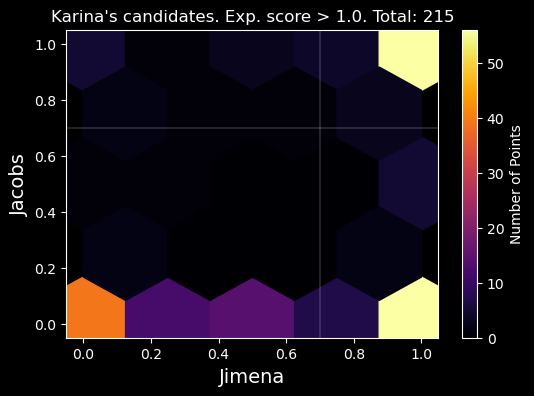

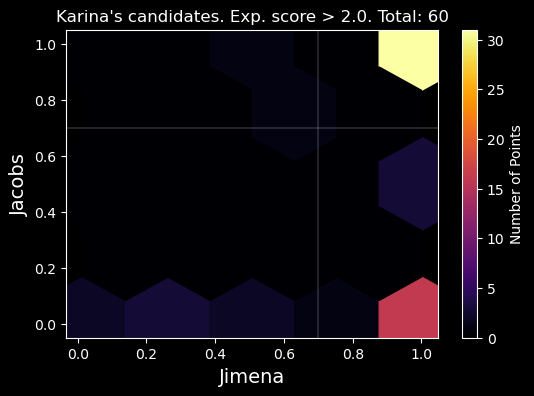

In [13]:
# In Karina's candidates, heat map

dist_scores = np.linspace(0, 2, 3)

for i in range(len(dist_scores)):
    data_tmp = cand_karina[cand_karina['score'] > dist_scores[i]]

    plt.figure(figsize=(6,4)) 
    text = 'Karina\'s candidates. Exp. score > {}. Total: {}'.format(dist_scores[i], len(data_tmp))
    plt.title(text)
    plt.ylabel('Jacobs', fontsize=14)
    plt.xlabel('Jimena', fontsize=14)
    hb = plt.hexbin(data_tmp['SINGLE'], data_tmp['score_sims'], gridsize=4, cmap='inferno')#, vmin=0, vmax=70)
    cb = plt.colorbar(hb)
    cb.set_label('Number of Points')

    plt.axhline(y=0.7, color='w', linestyle='-', linewidth=0.2)
    plt.axvline(x=0.7, color='w', linestyle='-', linewidth=0.2)

    plt.show()

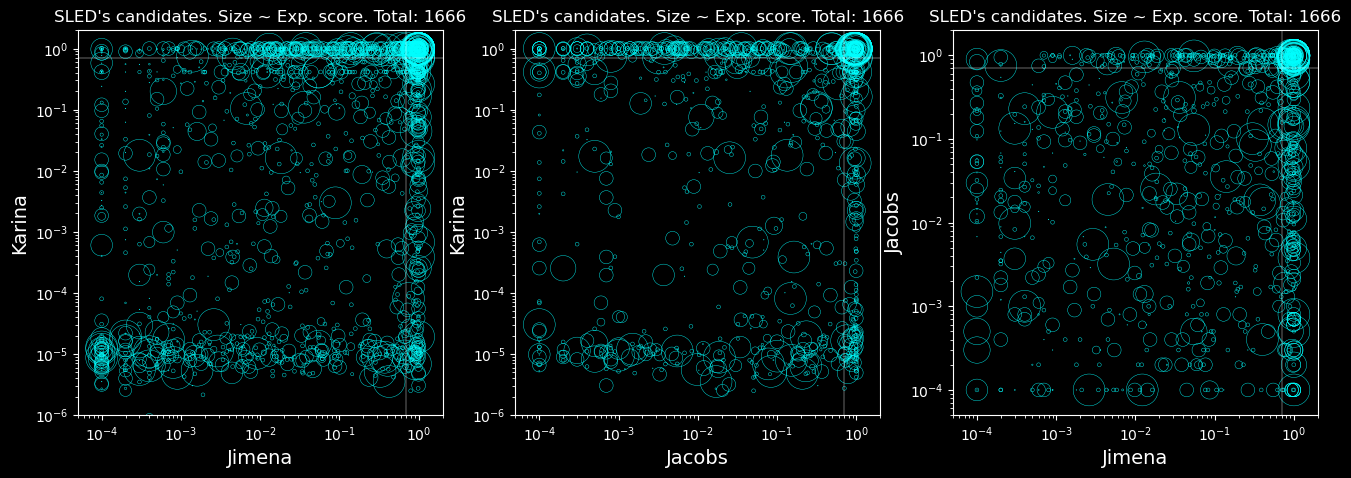

In [14]:
# In SLED database

cand_sled = pd.read_csv('data/in_SLED2.csv')
cand_sled = cand_sled[cand_sled['score'].notnull()]
cand_sled['score'] = pd.to_numeric(cand_sled['score'], errors='coerce')
cand_sled = cand_sled.dropna(subset=['score'])
cand_sled = cand_sled.reset_index(drop=True)
cand_sled = cand_sled.astype({'score': float})

# Adding my expert scores to the data
size = (cand_sled['score'] + [0.5]*len(cand_sled))**5 

plt.figure(figsize=(16,5)) 

plt.subplot(1,3,1)
plt.title('SLED\'s candidates. Size ~ Exp. score. Total: ' + str(len(cand_sled)))
plt.ylabel('Karina', fontsize=14)
plt.xlabel('Jimena', fontsize=14)
plt.ylim(10**(-6), 2)
plt.xlim(0.5*10**(-4), 2)
plt.scatter(cand_sled['SINGLE'], cand_sled['K_SCORE'], alpha=1, s=size.values, 
            edgecolors='#00FFFF', facecolors='none', linewidth=0.3)
plt.yscale("log")
plt.xscale("log")
plt.axhline(y=0.7, color='w', linestyle='-', linewidth=0.3)
plt.axvline(x=0.7, color='w', linestyle='-', linewidth=0.3)

plt.subplot(1,3,2)
plt.title('SLED\'s candidates. Size ~ Exp. score. Total: ' + str(len(cand_sled)))
plt.ylabel('Karina', fontsize=14)
plt.xlabel('Jacobs', fontsize=14)
plt.ylim(10**(-6), 2)
plt.xlim(0.5*10**(-4), 2)
plt.scatter(cand_sled['score_sims'], cand_sled['K_SCORE'], alpha=1, s=size.values, 
            edgecolors='#00FFFF', facecolors='none', linewidth=0.3)
plt.yscale("log")
plt.xscale("log")
plt.axhline(y=0.7, color='w', linestyle='-', linewidth=0.3)
plt.axvline(x=0.7, color='w', linestyle='-', linewidth=0.3)

plt.subplot(1,3,3)
plt.title('SLED\'s candidates. Size ~ Exp. score. Total: ' + str(len(cand_sled)))
plt.ylabel('Jacobs', fontsize=14)
plt.xlabel('Jimena', fontsize=14)
plt.ylim(0.5*10**(-4), 2)
plt.xlim(0.5*10**(-4), 2)
plt.scatter(cand_sled['SINGLE'], cand_sled['score_sims'], alpha=1, s=size.values, 
            edgecolors='#00FFFF', facecolors='none', linewidth=0.3)
plt.yscale("log")
plt.xscale("log")
plt.axhline(y=0.7, color='w', linestyle='-', linewidth=0.3)
plt.axvline(x=0.7, color='w', linestyle='-', linewidth=0.3)
        
plt.show()

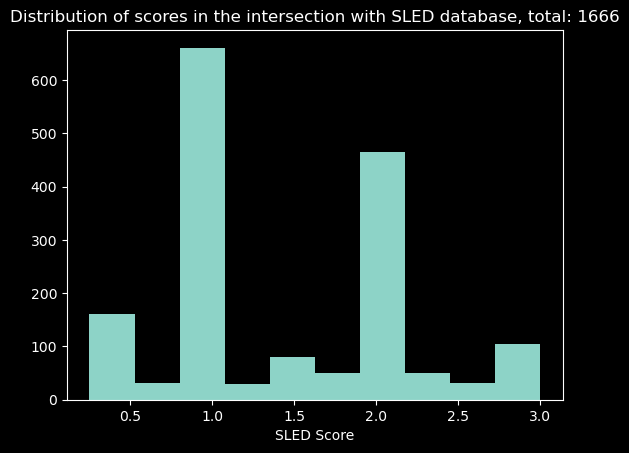

In [15]:
plt.figure()
plt.title('Distribution of scores in the intersection with SLED database, total: ' + str(len(cand_sled)))
plt.xlabel('SLED Score')
plt.hist(cand_sled['score'])
plt.show()

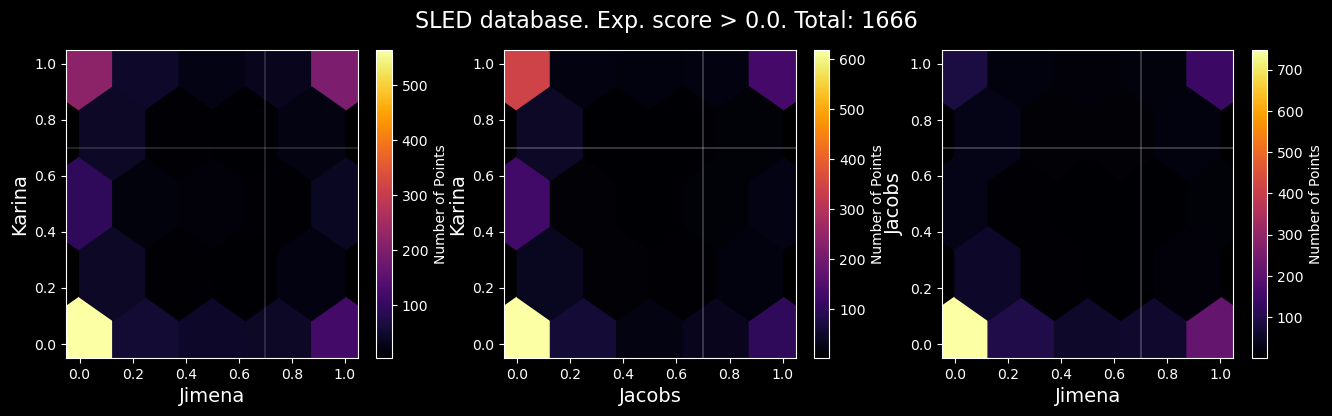

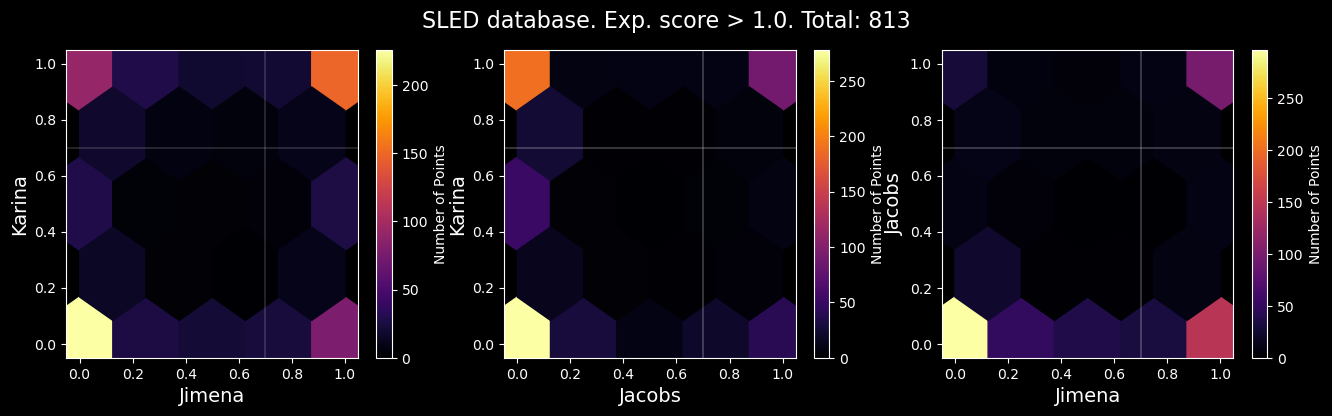

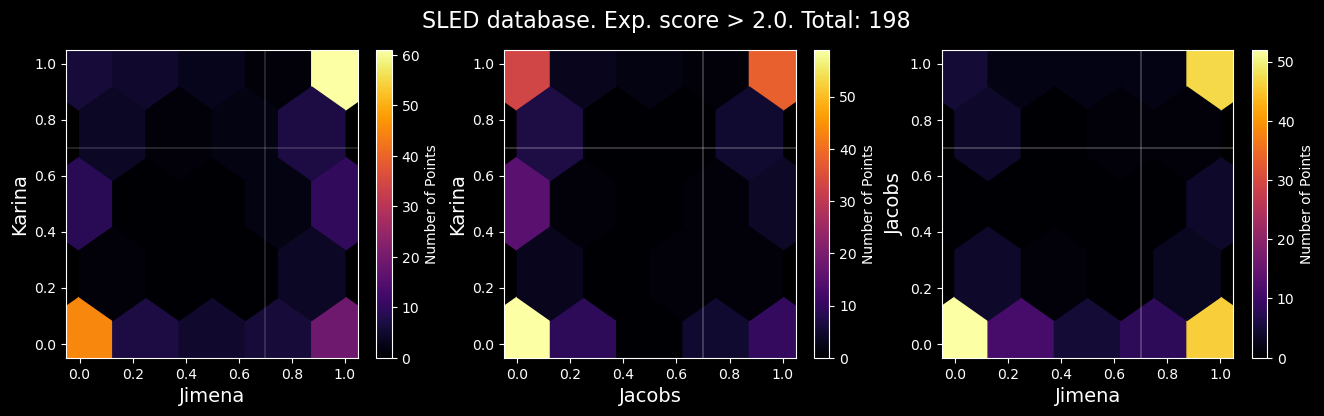

In [16]:
# In SLED database, heat map

dist_scores = np.linspace(0, 2, 3)

for i in range(len(dist_scores)):
    data_tmp = cand_sled[cand_sled['score'] > dist_scores[i]]

    plt.figure(figsize=(16,4)) 
    text = 'SLED database. Exp. score > {}. Total: {}'.format(dist_scores[i], len(data_tmp))
    plt.suptitle(text, fontsize=16)

    plt.subplot(1,3,1)
    plt.ylabel('Karina', fontsize=14)
    plt.xlabel('Jimena', fontsize=14)
    hb = plt.hexbin(data_tmp['SINGLE'], data_tmp['K_SCORE'], gridsize=4, cmap='inferno')
    cb = plt.colorbar(hb)
    cb.set_label('Number of Points')
    plt.axhline(y=0.7, color='w', linestyle='-', linewidth=0.2)
    plt.axvline(x=0.7, color='w', linestyle='-', linewidth=0.2)

    plt.subplot(1,3,2)
    plt.ylabel('Karina', fontsize=14)
    plt.xlabel('Jacobs', fontsize=14)
    hb = plt.hexbin(data_tmp['score_sims'], data_tmp['K_SCORE'], gridsize=4, cmap='inferno')
    cb = plt.colorbar(hb)
    cb.set_label('Number of Points')
    plt.axhline(y=0.7, color='w', linestyle='-', linewidth=0.3)
    plt.axvline(x=0.7, color='w', linestyle='-', linewidth=0.3)

    plt.subplot(1,3,3)
    plt.ylabel('Jacobs', fontsize=14)
    plt.xlabel('Jimena', fontsize=14)
    hb = plt.hexbin(data_tmp['SINGLE'], data_tmp['score_sims'], gridsize=4, cmap='inferno')
    cb = plt.colorbar(hb)
    cb.set_label('Number of Points')
    plt.axhline(y=0.7, color='w', linestyle='-', linewidth=0.3)
    plt.axvline(x=0.7, color='w', linestyle='-', linewidth=0.3)

    plt.show()
    

In [23]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
%matplotlib widget

# Calculate the size for the points
size = (cand_sled['score'] + [0.5]*len(cand_sled))**5

# Create a figure
fig = plt.figure(figsize=(10, 7))

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(cand_sled['SINGLE'], cand_sled['K_SCORE'], cand_sled['score_sims'], 
                s=size.values, edgecolors='#00FFFF', facecolors='none', linewidth=0.3)

# Set labels
ax.set_xlabel('Jimena')
ax.set_ylabel('Karina')
ax.set_zlabel('Jacobs')
ax.set_title('3D Scatter Plot of SLED\'s Candidates')

# Show plot
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [18]:
%matplotlib inline

print(len(cand_sled))
filtered_cand_sled = cand_sled[(cand_sled['K_SCORE'] < 0.01) & (cand_sled['SINGLE'] < 0.01) & (cand_sled['score_sims'] < 0.01)]
print(len(filtered_cand_sled))
filtered_cand_sled = filtered_cand_sled[filtered_cand_sled['score']>2]
print(len(filtered_cand_sled))
filtered_cand_sled = filtered_cand_sled.astype({'COADD_OBJECT_ID': int})
filtered_cand_sled.to_csv('data/sled_low_probs.csv', index=False)
filtered_cand_sled.head()

1666
235
26


,K_RA,K_DEC,K_SCORE,Y3_COADD_OBJECT_ID,J_RA,J_DEC,score_sims,score_real,score_both,COADD_OBJECT_ID,...,score,image_sep,info,n_img,flag,image_conf,lens_type,source_type,contaminant_type,papers
88,6.247430,-6.649603,0.000008,197076637.0,6.247430,-6.649603,0.0005,0.0,0.0,1064454533,...,2.75,None,"Well-formed OII(b, a). The shape of the OII(b,...",None,CANDIDATE,NaN,Galaxy,Galaxy,NaN,2021MNRAS.502.4617T
90,359.553176,-6.671494,0.000010,175157103.0,359.553176,-6.671494,0.0001,0.0,0.0,1031580734,...,2.50,None,"Discernable OII(b, a). The shape of the OII(b,...",None,CANDIDATE,NaN,Galaxy,Galaxy,NaN,2021MNRAS.502.4617T
141,25.288475,-8.435695,0.000029,248817219.0,25.288475,-8.435695,0.0000,0.0,0.0,1313281385,...,2.75,None,"Well-formed OII(b, a). The shape of the OII(b,...",None,CANDIDATE,NaN,Galaxy,Galaxy,NaN,2021MNRAS.502.4617T
143,26.141539,-8.276032,0.000604,266320166.0,26.141539,-8.276032,0.0000,0.0,0.0,1194691803,...,2.50,None,"Well-formed OII(b, a). The shape of the OII(b,...",None,CANDIDATE,NaN,Galaxy,Galaxy,NaN,2021MNRAS.502.4617T
164,21.833382,-4.103823,0.000011,219945174.0,21.833382,-4.103823,0.0000,0.0,0.0,1173581271,...,3.00,None,"Well-formed OII(b, a). The shape of the OII(b,...",None,CANDIDATE,NaN,Galaxy,Galaxy,NaN,2021MNRAS.502.4617T


In [19]:
# I need to put the three samples together: find the overlap that got graded by experts
# TODO: See correlation between expert scores
print(cand_jacobs.columns)
print(cand_jimena.columns)

common_ids_karina_jimena = pd.merge(cand_karina[['COADD_OBJECT_ID']], cand_jimena[['COADD_OBJECT_ID']], on='COADD_OBJECT_ID')
common_ids_all = pd.merge(common_ids_karina_jimena, cand_jacobs[['COADD_OBJECT_ID']], on='COADD_OBJECT_ID')

mask = cand_jimena['COADD_OBJECT_ID'].isin(common_ids_all['COADD_OBJECT_ID'])
data_tmp = cand_jimena[mask]
data_tmp.head()

Index(['K_RA', 'K_DEC', 'K_SCORE', 'Y3_COADD_OBJECT_ID', 'J_RA', 'J_DEC',
       'score_sims', 'score_real', 'score_both', 'COADD_OBJECT_ID', 'G_RA',
       'G_DEC', 'SINGLE', 'RING', 'SMOOTH', 'COMPANIONS', 'SDSS_SPIRALS',
       'DES_SPIRALS', 'CROWDED', 'ARTIFACTS', 'MOST_NEGATIVES', 'index', 'ra',
       'dec', 'name', 'score', 'image_sep', 'info', 'n_img', 'flag',
       'image_conf', 'lens_type', 'source_type', 'contaminant_type', 'papers'],
      dtype='object')
Index(['K_RA', 'K_DEC', 'K_SCORE', 'Y3_COADD_OBJECT_ID', 'J_RA', 'J_DEC',
       'score_sims', 'score_real', 'score_both', 'COADD_OBJECT_ID', 'G_RA',
       'G_DEC', 'SINGLE', 'RING', 'SMOOTH', 'COMPANIONS', 'SDSS_SPIRALS',
       'DES_SPIRALS', 'CROWDED', 'ARTIFACTS', 'MOST_NEGATIVES',
       'Aver_norm_wo_8'],
      dtype='object')


,K_RA,K_DEC,K_SCORE,Y3_COADD_OBJECT_ID,J_RA,J_DEC,score_sims,score_real,score_both,COADD_OBJECT_ID,...,SINGLE,RING,SMOOTH,COMPANIONS,SDSS_SPIRALS,DES_SPIRALS,CROWDED,ARTIFACTS,MOST_NEGATIVES,Aver_norm_wo_8
27,22.610387,-15.336907,0.995746,226417019,22.610387,-15.336907,1.0000,0.0,1.0000,1177839322,...,0.9989,0.0001,0.0001,0.0002,0.0,0.0,0.0005,0.0001,0.0001,2.455292
30,21.221090,-14.717383,0.999817,223066247,21.221090,-14.717383,1.0000,0.0,1.0000,1171046571,...,0.9994,0.0000,0.0001,0.0003,0.0,0.0,0.0000,0.0000,0.0000,1.923045
33,29.681923,-13.025800,0.999921,61814814,29.681923,-13.025800,0.0021,0.0,0.0000,1225134030,...,0.9998,0.0000,0.0000,0.0001,0.0,0.0,0.0000,0.0000,0.0000,0.661849
35,25.862225,-8.839247,0.997850,266637953,25.862225,-8.839247,1.0000,0.0,0.9999,1194748640,...,1.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,2.676636
39,19.494766,-5.454924,0.983808,306602282,19.494766,-5.454924,0.0000,0.0,0.0000,1159257785,...,0.9935,0.0001,0.0002,0.0014,0.0,0.0,0.0046,0.0001,0.0001,2.367617


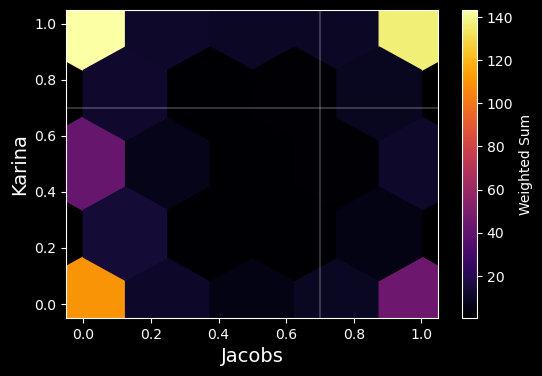

In [20]:
#Jimena heat map, with weights for higher scored systems
score_sims = cand_jimena['score_sims']
k_score = cand_jimena['K_SCORE']
aver_norm_wo_8 = cand_jimena['Aver_norm_wo_8'] #+ [1]*len(cand_jimena)

plt.figure(figsize=(6,4)) 
plt.ylabel('Karina', fontsize=14)
plt.xlabel('Jacobs', fontsize=14)

# Create the hexbin plot with scaled contribution
hb = plt.hexbin(score_sims, k_score, C=aver_norm_wo_8, gridsize=4, cmap='inferno', reduce_C_function=np.sum)

# Add a color bar to the plot
cb = plt.colorbar(hb)
cb.set_label('Weighted Sum')

# Optionally set logarithmic scale for axes if needed
# plt.yscale("log")
# plt.xscale("log")

plt.axhline(y=0.7, color='w', linestyle='-', linewidth=0.3)
plt.axvline(x=0.7, color='w', linestyle='-', linewidth=0.3)

plt.show()

In [21]:
#I need to concatenate the samples when the scores from SLED or my scores are high

concatenated_df = pd.concat([cand_karina[cand_karina['score'] > 2], 
                             cand_jimena[cand_jimena['Aver_norm_wo_8'] > 2], #]]) 
                             cand_jacobs[cand_jacobs['score'] > 2]])
concatenated_df.reset_index(drop=True, inplace=True)
concatenated_df.drop_duplicates(inplace=True)

print(len(concatenated_df))
concatenated_df.head()

202


,K_RA,K_DEC,K_SCORE,Y3_COADD_OBJECT_ID,J_RA,J_DEC,score_sims,score_real,score_both,COADD_OBJECT_ID,...,image_sep,info,n_img,flag,image_conf,lens_type,source_type,contaminant_type,papers,Aver_norm_wo_8
0,9.593161,-25.842242,0.970344,155609778.0,9.593161,-25.842242,1.0000,0.0,0.0000,1.084326e+09,...,4.94,NaN,None,CANDIDATE,NaN,Galaxy,NaN,NaN,"2019ApJS..243...17J, 2019MNRAS.484.5330J, 2022...",NaN
1,21.221090,-14.717383,0.999817,223066247.0,21.221090,-14.717383,1.0000,0.0,1.0000,1.171047e+09,...,6.74,NaN,None,CANDIDATE,NaN,Galaxy,NaN,NaN,"2019ApJS..243...17J, 2019MNRAS.484.5330J, 2022...",NaN
2,24.372653,-10.656303,0.999718,235915543.0,24.372653,-10.656303,0.0000,0.0,0.0000,1.304724e+09,...,3.89,NaN,None,CANDIDATE,NaN,Galaxy,NaN,NaN,2022A&A...668A..73R,NaN
3,33.533809,-5.592639,0.623066,90147520.0,33.533809,-5.592639,0.0386,0.0,0.0000,1.253220e+09,...,14.6,NaN,None,CANDIDATE,NaN,"Galaxy, Group of galaxies",Galaxy,NaN,"2007A&A...461..813C, 2012ApJ...749...38M, 2020...",NaN
4,33.533527,-5.591933,0.999533,90147479.0,33.533527,-5.591933,0.9725,0.0,0.0082,1.253221e+09,...,14.6,NaN,None,CANDIDATE,NaN,"Galaxy, Group of galaxies",Galaxy,NaN,"2007A&A...461..813C, 2012ApJ...749...38M, 2020...",NaN


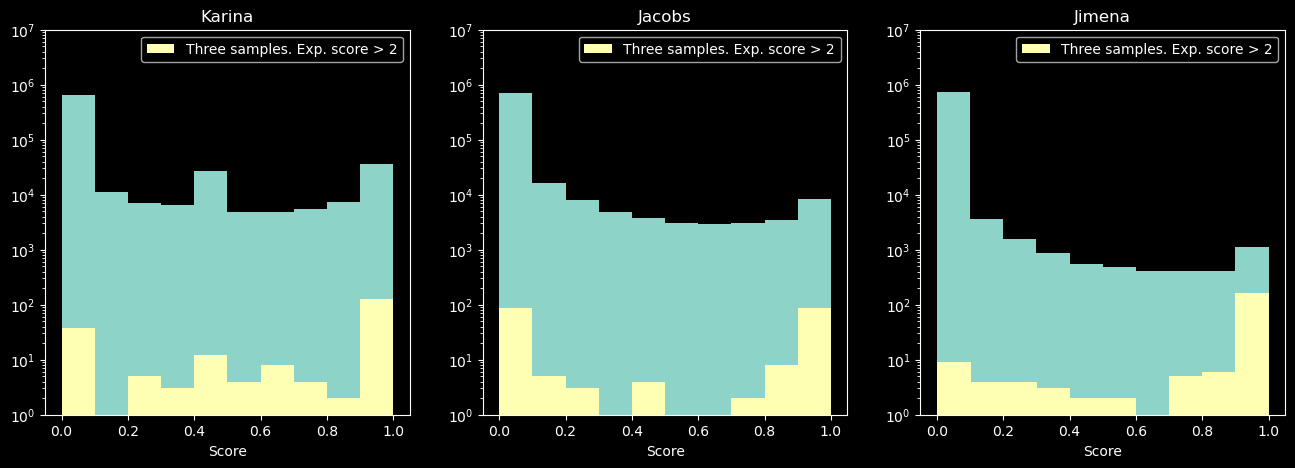

In [22]:
#Concatenate all three candidate samples

plt.figure(figsize=(16,5)) 
    
plt.subplot(1,3,1)
plt.title('Karina')
plt.hist(data['K_SCORE'])
plt.hist(concatenated_df['K_SCORE'], label='Three samples. Exp. score > 2')
plt.xlabel('Score')
plt.yscale('log')
plt.ylim(1, 10**7)
plt.legend()

plt.subplot(1,3,2)
plt.title('Jacobs')
plt.hist(data['score_sims'])
plt.hist(concatenated_df['score_sims'], label='Three samples. Exp. score > 2')
plt.xlabel('Score')
plt.yscale('log')
plt.ylim(1, 10**7)
plt.legend()

plt.subplot(1,3,3)
plt.title('Jimena')
plt.hist(data['SINGLE'])
plt.hist(concatenated_df['SINGLE'], label='Three samples. Exp. score > 2')
plt.xlabel('Score')
plt.yscale('log')
plt.ylim(1, 10**7)
plt.legend()

plt.show()